# The Pi-Mu-e Expermiment

Nathaniel Flower, Liam Patterson

# Abstract

The pion decays into a muon and neutrino. The muon then decays into a positron and two neutrinos. The mass of the pion and muon was measured by measuring the length of the muon tracks and the radius of curvature of the positron tracks. After measuring the lengths and radius of several tracks and finding the averages, equations were formulated to find these masses. The mass of the muon was found to be 114.14 Mev/c^2 (actual = 106 Mev/c^2) with a 7.68% error and the mass of the pion was found to be 146.96 Mev/c^2 (actual = 140 Mev/c^2) with a 4.97% error.

# Introduction

When high energy particles from the sun enter the atmosphere they collide with the nuclei of air molecules, which then produce many particles including the pion. The pions will spontaneously decay into a muon and a neutrino. the muon will decay as well into a positron and two neutrinos afterwards. With the right equipment, one can see the paths of the these particles. For this experiment, the particles will be going through a B-field in liquid hydrogen. The pion will have a curved path then if it suddenly goes into a short straight path then at the beginning of this new path, the pion decayed into the muon. After the short path, if the path goes back into a curved state then at the beginning of this new path, the muon decayed into the positron. By measuring the length of the muon and the radius of the positron, one can figure out the mass of the both the muon and the pion.

Pion Decay
\begin{equation}
\pi^+ \rightarrow \mu^+ + \nu
\end{equation}

Muon Decay
\begin{equation}
\mu^+ \rightarrow e^+ + \nu + \nu'
\end{equation}

# Methods

For our experiment, we used the photos of data taken from the (blank) experiment. We separated the photos amongst all groups to measure the lengths of the muon and the radii of the positrons. We used rulers to measure the lengths in cm and a special paper designed for measuring radii in cm. After everyone was finished, we combined all of the data. The average length of the muon and radius of the positron was found with the combined data. Along with this data, we had our own experimental data being processed. This second set of data was to be graphed.

# Results and Analysis

\begin{equation}
p_\perp = mv = eRB
\end{equation}

\begin{equation}
p_e = \frac{p_\perp}{sin\theta} = \frac{eRB}{sin\theta} = \frac{eRB}{.785}
\end{equation}

\begin{equation}
E_\mu = m_\mu c^2 = E_e+E_\nu+E_\nu ' \approx c(p_e + p_\nu + p_\nu')
\end{equation}

\begin{equation}
cp_e \approx cp_\nu \approx cp_\nu' \approx \frac{m_\mu c^2}{3}
\end{equation}

\begin{equation}
m_\mu \approx \frac{3eRB}{.785c}
\end{equation}

\begin{equation}
T = \sqrt{2.1m_\mu c^2pL}
\end{equation}

\begin{equation}
(p_\mu c)^2 = T^2 + 2Tm_\mu c^2
\end{equation}

\begin{equation}
m_\pi c^2= E_\mu+E_\nu
\end{equation}

\begin{equation}
m_\pi c^2 = \sqrt{(p_\mu c)^2 + (m_\mu c^2)^2} + p_\mu c
\end{equation}

In [40]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np

global C
global B
global RHO
global E

E = 3e-4
RHO = 0.07
B = 8800
C = 1 

MASS_MUON = 106
MASS_PION = 140


def massMuon(radius):
    global C
    global B
    global E
    return (3*E*B*radius)/.785
    

def kineticEnergyMuon(radius, length):
    global RHO
    global C
    return math.sqrt(2.1*massMuon(radius)*(C**2)*RHO*length)
    

def massPion(radius,length):
    global C
    return (math.sqrt(kineticEnergyMuon(radius, length)**2 + 2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2) 
                     + (massMuon(radius)*(C**2))**2) + math.sqrt(kineticEnergyMuon(radius, length)**2 + 
                     2*kineticEnergyMuon(radius, length)*massMuon(radius)*(C**2)))/(C**2)

In [41]:
fle = ascii.read('data.csv')

avg_radius = fle['radius'].mean()
avg_length = (fle['length'].mean())*.785

p_error_muon = ((massMuon(avg_radius)-MASS_MUON)/MASS_MUON)*100
p_error_pion = ((massPion(avg_radius, avg_length)-MASS_PION)/MASS_PION)*100

print(avg_radius)
print(avg_length)
print()
print(massMuon(avg_radius))
print(MASS_MUON)
print(p_error_muon)
print()
print(massPion(avg_radius, avg_length))
print(MASS_PION)
print(p_error_pion)

10.9
0.800102329545

109.971974522
106
3.74714577575

141.9224040092914
140
1.3731457209224271


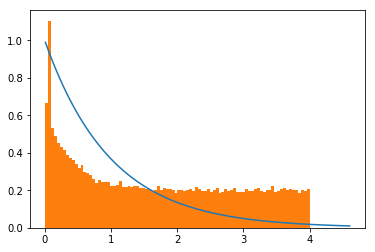

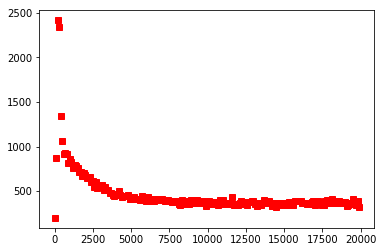

In [57]:
from scipy.stats import expon
import matplotlib.pyplot as plt

data = ascii.read('exp_data.csv', 'r')['delta_t']
data = np.sort(data)
temp = [4*d/data[-1] for d in data ]

param = expon.fit(data)

x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)

plt.plot(x, expon.pdf(x))
plt.hist(temp, bins=90, normed=True)
plt.show()
    
num_bins = 200
div = 20000 // num_bins

bins = [0] *num_bins
max_value = [n*div for n in range(num_bins)]
for d in data:
    bins[d//div] += 1

plt.plot(max_value, bins, 'rs')
plt.show()

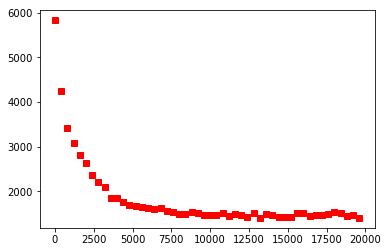

In [28]:
num_bins = 50
div = 20000 // num_bins

bins = [0] *num_bins
max_value = [n*div for n in range(num_bins)]
for d in data:
    bins[d//div] += 1

plt.plot(max_value, bins, 'rs')
plt.show()